In [172]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

In [117]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [118]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset has 918 rows and 12 columns.
It does not include any NAN values. 

Categorical columns: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

Numerical columns: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

Fasting BS and Heart Disease are categorical columns despite being ints

In [119]:
# basic metric of numerical column
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There are outliers in the Cholesterol column with a value of 603.00, in the Max HR column with a value of 202.00 
and in the Oldpeak column with a value of 6.20 

In [120]:
# basic metrics of categorical column
df.describe(include = "object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


The majority of individuals in this dataset are Males

The most common chest pain type is ASY

Most common value under Resting ECG is normal

Most common value under ExerciseAngina is N which stands for No

Most common value under ST_Slope is Flat with a value count of 460 

In [121]:
# checking for NAN values 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [122]:
# checking value counts per columns

# Chest Pain Type column
print("Chest Pain Type: \n", df["ChestPainType"].value_counts())
print("\n")

# Fasting BS
print("Fasting BS: \n", df["FastingBS"].value_counts())
print("\n")

# Resting ecg
print("Resting ECG: \n", df["RestingECG"].value_counts())
print("\n")

# Exercise Angina
print("Exercise Angina: \n", df["ExerciseAngina"].value_counts())
print("\n")

# ST Slope
print("ST Slope: \n", df["ST_Slope"].value_counts())
print("\n")

# Heart Disease
print("Heart Disease: \n", df["HeartDisease"].value_counts())
print("\n")

Chest Pain Type: 
 ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Fasting BS: 
 0    704
1    214
Name: FastingBS, dtype: int64


Resting ECG: 
 Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


Exercise Angina: 
 N    547
Y    371
Name: ExerciseAngina, dtype: int64


ST Slope: 
 Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


Heart Disease: 
 1    508
0    410
Name: HeartDisease, dtype: int64




410 of the cases have no heart disease and 508 have a heart disease

In [123]:
df["HeartDisease"].value_counts(normalize = True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

The distribution of class between 0 and 1 is almost equal.

Dataset in not imbalanced.

## Data Preparation

In [124]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [125]:
# changing Exercise Angina from Yes and No to Binary 
df["ExerciseAngina"].replace(to_replace = {"N": 0, "Y": 1}, inplace = True)

In [126]:
# turning negative values in the Oldpeak column to positive
df["Oldpeak"] = df["Oldpeak"].apply(abs)

In [127]:
# there are no NAN values in the dataset but there are some 0 values
# will use simple imputer to impute zero values with the median cholesterol after train test split
df.loc[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,1,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,0,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,1,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,1,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,1,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,0,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,0,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,1,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,1,1.0,Flat,1


In [128]:
df.loc[df["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,0,1.5,Flat,1


In [129]:
# adding blood pressure cat to categorize resting bp level
df.loc[df["RestingBP"] < 120, "BloodPressCat"] = "Normal"
df.loc[(df["RestingBP"] >= 120) & (df["RestingBP"] <= 129), "BloodPressCat"] = "Elevated"
df.loc[(df["RestingBP"] >= 130) & (df["RestingBP"] <= 139), "BloodPressCat"] = "High Blood Pressure Stage 1"
df.loc[(df["RestingBP"] >= 140) & (df["RestingBP"] <= 179), "BloodPressCat"] = "High Blood Pressure Stage 2"
df.loc[df["RestingBP"] > 180, "BloodPressCat"] = "Hypertensive Crisis"

Based on Blood Pressure Charts online, a Resting Blood Pressure of:

BP < 120 is Normal 

BP >= 120 and <= 129 is Elevated

BP >= 130 and <= 139 is High Blood Pressure Stage 1

BP >= 140 and <= 179 is High Blood Pressure Stage 2

BP > 180 is Hypertensive Crisis

In [130]:
# dropping RestingBP Column 
del df["RestingBP"]

In [131]:
# changing heart rate to categorical
df.loc[df["MaxHR"] <= 100, "HeartRateCat"] = "Normal"
df.loc[df["MaxHR"] > 100, "HeartRateCat"] = "Tachycardia"

In [132]:
del df["MaxHR"]

## EDA

In [133]:
# separate dataframe for individuals with Heart Disease
with_heart_disease = df.loc[df["HeartDisease"] == 1]
with_heart_disease

,Age,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BloodPressCat,HeartRateCat
1,49,F,NAP,180,0,Normal,0,1.0,Flat,1,High Blood Pressure Stage 2,Tachycardia
3,48,F,ASY,214,0,Normal,1,1.5,Flat,1,High Blood Pressure Stage 1,Tachycardia
8,37,M,ASY,207,0,Normal,1,1.5,Flat,1,High Blood Pressure Stage 2,Tachycardia
11,58,M,ATA,164,0,ST,1,2.0,Flat,1,High Blood Pressure Stage 1,Normal
13,49,M,ASY,234,0,Normal,1,1.0,Flat,1,High Blood Pressure Stage 2,Tachycardia
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,241,0,Normal,1,0.2,Flat,1,High Blood Pressure Stage 2,Tachycardia
913,45,M,TA,264,0,Normal,0,1.2,Flat,1,Normal,Tachycardia
914,68,M,ASY,193,1,Normal,0,3.4,Flat,1,High Blood Pressure Stage 2,Tachycardia
915,57,M,ASY,131,0,Normal,1,1.2,Flat,1,High Blood Pressure Stage 1,Tachycardia


In [134]:
# Average age of individuals with Heart Disease
with_heart_disease["Age"].mean()

55.8996062992126

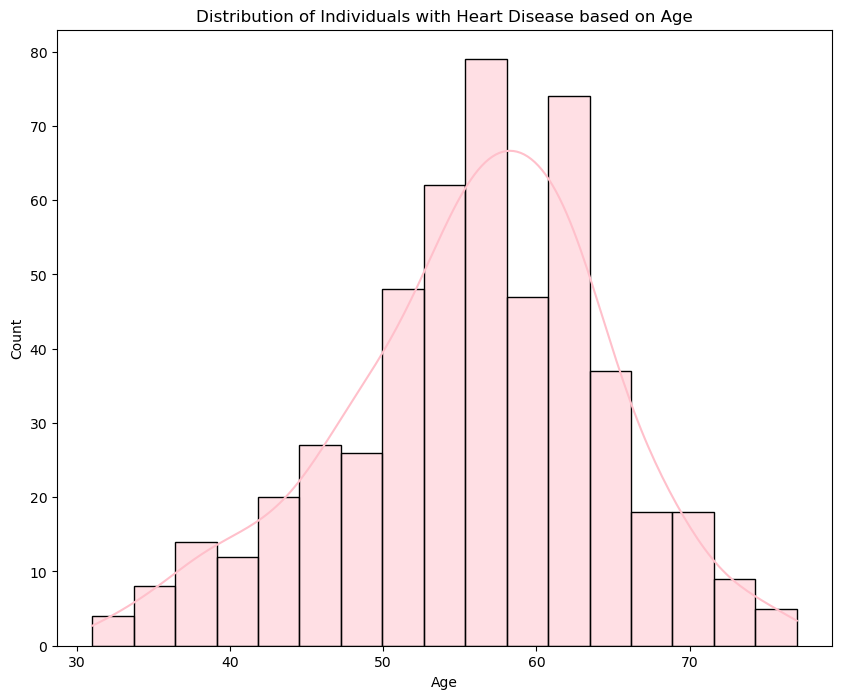

In [135]:
# distribution of individuals with heart disease based on age
fig, ax = plt.subplots(figsize = (10, 8))
sns.histplot(x = with_heart_disease["Age"], color = "pink", kde = True)
plt.title("Distribution of Individuals with Heart Disease based on Age")
plt.xlabel("Age")
plt.show();

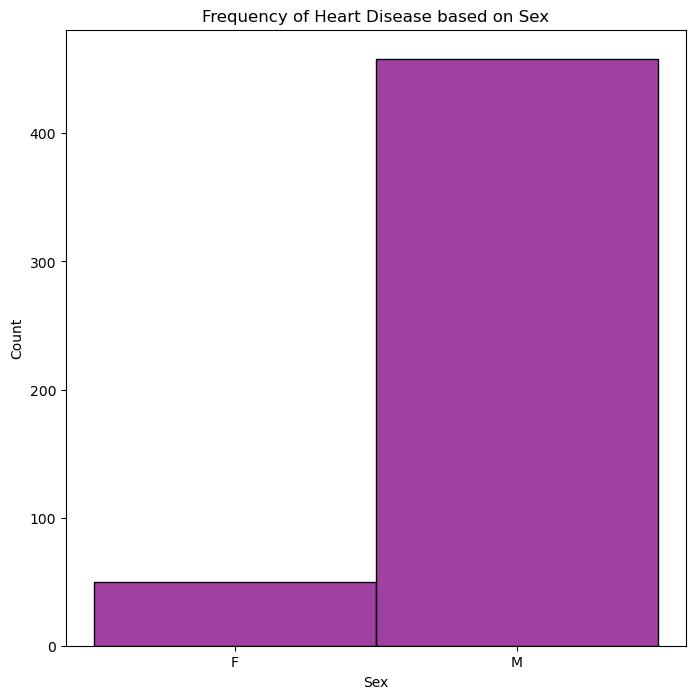

In [136]:
# distribution of individuals with heart disease based on sex
fig, ax = plt.subplots(figsize = (8, 8))
sns.histplot(data = with_heart_disease, x = "Sex", color = "Purple")
plt.title("Frequency of Heart Disease based on Sex")
plt.xlabel("Sex")
plt.show();

According to these 2 plots, old men are more susceptible to heart diseases

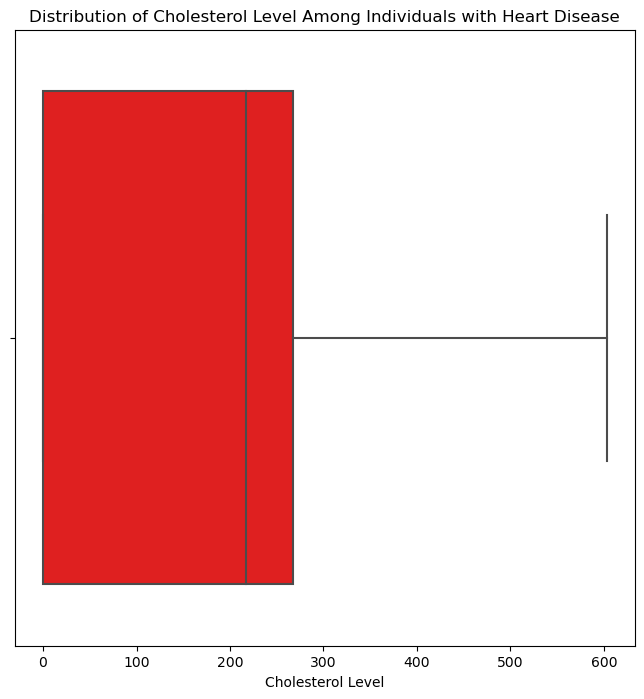

In [137]:
# distribution of cholesterol levels among individuals with heart disease
fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(x = with_heart_disease["Cholesterol"], color = "Red")
plt.title("Distribution of Cholesterol Level Among Individuals with Heart Disease")
plt.xlabel("Cholesterol Level")
plt.show();

Cholesterol levels of 0 is not possible, will Impute rows with cholesterol level of 0 after train test split

In [138]:
# most prevalent chest pain type between male and female with heart disease
cpt = with_heart_disease[["ChestPainType", "Sex"]].value_counts(normalize = True).reset_index()
cpt = cpt.rename(columns = {0: "Percentage"})
cpt

,ChestPainType,Sex,Percentage
0,ASY,M,0.694882
1,NAP,M,0.129921
2,ASY,F,0.076772
3,ATA,M,0.039370
4,TA,M,0.037402
5,NAP,F,0.011811
6,ATA,F,0.007874
7,TA,F,0.001969


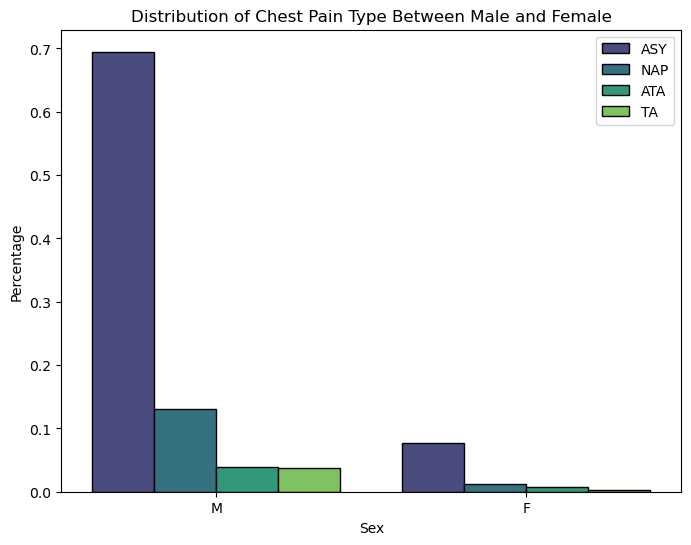

In [139]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = cpt, x = "Sex", y = "Percentage", hue = "ChestPainType", edgecolor = "black", palette = "viridis")
plt.title("Distribution of Chest Pain Type Between Male and Female")
plt.legend()
plt.show();

0.77 percent of individuals with heart disease were asymptomatic, which means they did not exhibit any signs of heart disease
but actually have a heart disease

In [140]:
# most prevalent resting ecg between male and female with heart disease
r_ecg = with_heart_disease[["RestingECG", "Sex"]].value_counts(normalize = True).reset_index()
r_ecg = r_ecg.rename(columns = {0: "Percentage"})
r_ecg

,RestingECG,Sex,Percentage
0,Normal,M,0.503937
1,ST,M,0.216535
2,LVH,M,0.181102
3,Normal,F,0.057087
4,LVH,F,0.027559
5,ST,F,0.013780


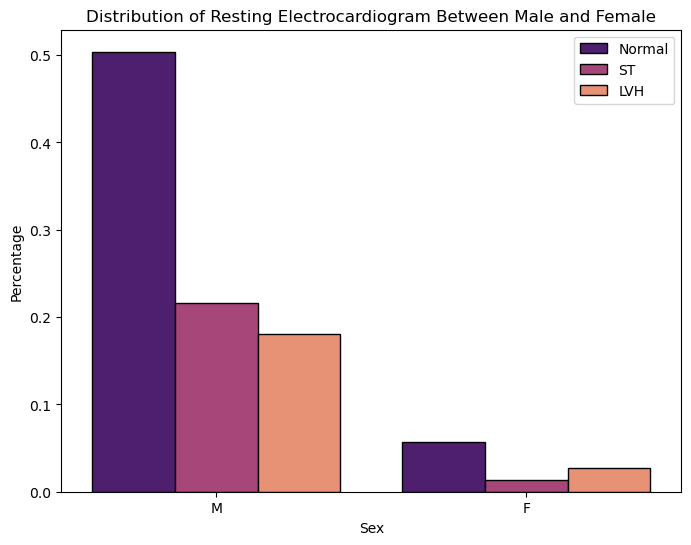

In [141]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = r_ecg, x = "Sex", y = "Percentage", hue = "RestingECG", edgecolor = "black", palette = "magma")
plt.title("Distribution of Resting Electrocardiogram Between Male and Female")
plt.legend()
plt.show();

In [142]:
# most prevalent blood pressure category between male and female with heart disease
blood_press_cat = with_heart_disease[["BloodPressCat", "Sex"]].value_counts(normalize = True).reset_index()
blood_press_cat = blood_press_cat.rename(columns = {0: "Percentage"})
blood_press_cat

,BloodPressCat,Sex,Percentage
0,High Blood Pressure Stage 2,M,0.340637
1,Elevated,M,0.197211
2,High Blood Pressure Stage 1,M,0.191235
3,Normal,M,0.165339
4,High Blood Pressure Stage 2,F,0.041833
5,High Blood Pressure Stage 1,F,0.025896
6,Elevated,F,0.013944
7,Hypertensive Crisis,M,0.009960
8,Normal,F,0.009960
9,Hypertensive Crisis,F,0.003984


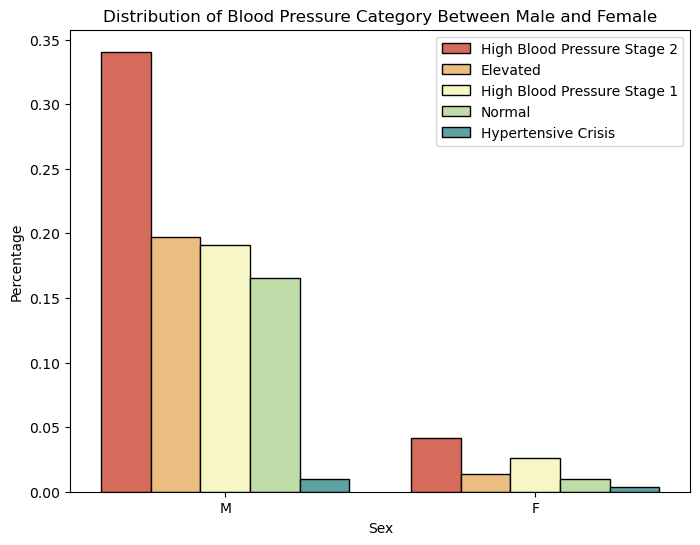

In [143]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = blood_press_cat, x = "Sex", y = "Percentage", hue = "BloodPressCat", edgecolor = "black", palette = "Spectral")
plt.title("Distribution of Blood Pressure Category Between Male and Female")
plt.legend()
plt.show();

In [144]:
# most prevalent St/Hr Slope among individuals with heart disease
st_slope = with_heart_disease[["ST_Slope", "Sex"]].value_counts(normalize = True).reset_index()
st_slope = st_slope.rename(columns = {0: "Percentage"})
st_slope

,ST_Slope,Sex,Percentage
0,Flat,M,0.673228
1,Up,M,0.141732
2,Down,M,0.086614
3,Flat,F,0.076772
4,Up,F,0.011811
5,Down,F,0.009843


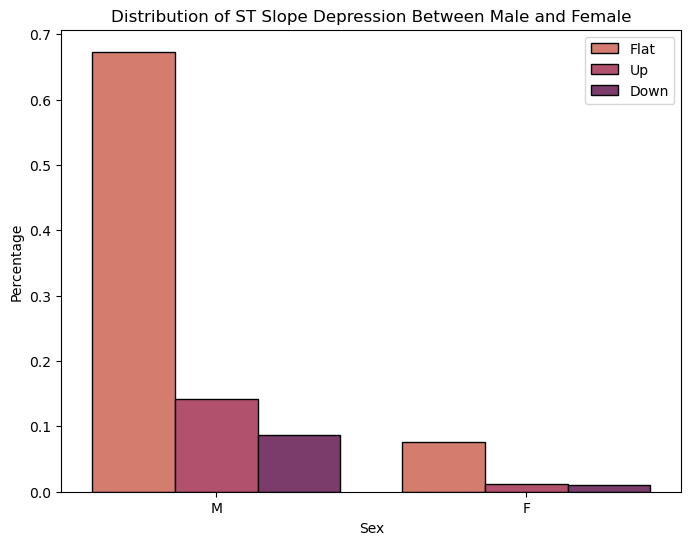

In [145]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = st_slope, x = "Sex", y = "Percentage", hue = "ST_Slope", edgecolor = "black", palette = "flare")
plt.title("Distribution of ST Slope Depression Between Male and Female")
plt.legend()
plt.show();

In [146]:
# distribution of heart rate category between male and female 
heart_rate_cat = with_heart_disease[["HeartRateCat", "Sex"]].value_counts(normalize = True).reset_index()
heart_rate_cat = heart_rate_cat.rename(columns = {0: "Percentage"})
heart_rate_cat

,HeartRateCat,Sex,Percentage
0,Tachycardia,M,0.777559
1,Normal,M,0.124016
2,Tachycardia,F,0.090551
3,Normal,F,0.007874


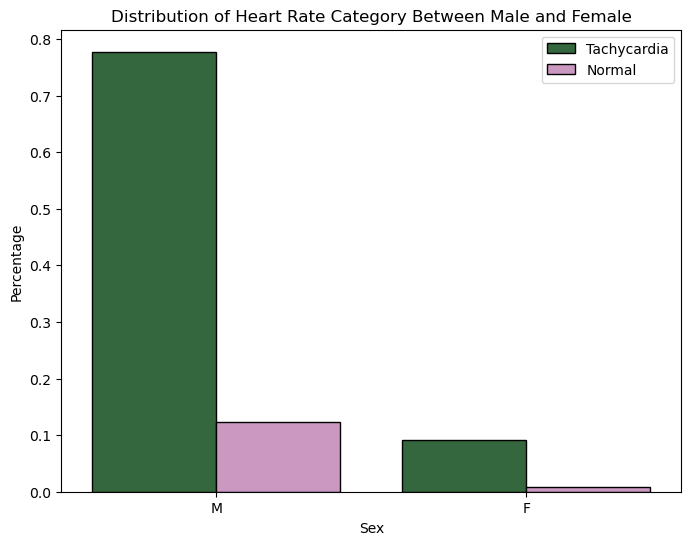

In [147]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = heart_rate_cat, x = "Sex", y = "Percentage", hue = "HeartRateCat", edgecolor = "black", palette = "cubehelix")
plt.title("Distribution of Heart Rate Category Between Male and Female")
plt.legend()
plt.show();

In [148]:
df

,Age,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BloodPressCat,HeartRateCat
0,40,M,ATA,289,0,Normal,0,0.0,Up,0,High Blood Pressure Stage 2,Tachycardia
1,49,F,NAP,180,0,Normal,0,1.0,Flat,1,High Blood Pressure Stage 2,Tachycardia
2,37,M,ATA,283,0,ST,0,0.0,Up,0,High Blood Pressure Stage 1,Normal
3,48,F,ASY,214,0,Normal,1,1.5,Flat,1,High Blood Pressure Stage 1,Tachycardia
4,54,M,NAP,195,0,Normal,0,0.0,Up,0,High Blood Pressure Stage 2,Tachycardia
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,264,0,Normal,0,1.2,Flat,1,Normal,Tachycardia
914,68,M,ASY,193,1,Normal,0,3.4,Flat,1,High Blood Pressure Stage 2,Tachycardia
915,57,M,ASY,131,0,Normal,1,1.2,Flat,1,High Blood Pressure Stage 1,Tachycardia
916,57,F,ATA,236,0,LVH,0,0.0,Flat,1,High Blood Pressure Stage 1,Tachycardia


## Modeling

In [149]:
# Since we are dealing with Heart Disease detection between individuals, we are going to put more weight on our true positives
# and hopefully decrease false negatives considering that misdiagnosing a patient could be fatal

In [227]:
# separating target variable and features
# train test split
X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [151]:
# use simple imputer to impute 0 values under the cholesterol column
#chol_imp = SimpleImputer(missing_values = 0, strategy = "median")
#X_train["Cholesterol"] = chol_imp.fit_transform(X_train[["Cholesterol"]])
#X_test["Cholesterol"] = chol_imp.transform(X_test[["Cholesterol"]])

In [226]:
# use One Hot Encode to turn categorical columns to binary 
#categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "BloodPressCat", "HeartRateCat"]

#ohe_train = pd.get_dummies(X_train[categorical_cols])
#ohe_test =  pd.get_dummies(X_test[categorical_cols])

#X_train = pd.concat([X_train, ohe_train], 1)
#X_test = pd.concat([X_test, ohe_test], 1)

#X_train.drop(columns = ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "BloodPressCat", "HeartRateCat"], inplace = True)
#X_test.drop(columns = ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "BloodPressCat", "HeartRateCat"], inplace = True)

In [221]:
#X_train[X_train['Cholesterol'] == 0] = X_train['Cholesterol'].median()
#X_test[X_test['Cholesterol'] == 0] = X_test['Cholesterol'].median()

In [232]:
# selecting numerical and categorical columns

num_cols = X_train.select_dtypes(['int', 'float']).columns
categorical_cols = X_train.select_dtypes('object').columns

In [212]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(fill_value = 0, strategy = 'median')),
    ('scaler', StandardScaler())])

nominal_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse = False, drop = 'first')), 
    ('ohenorm', MaxAbsScaler())])

ct = ColumnTransformer([ 
     ("nominalpipe", nominal_pipeline, categorical_cols),
     ("numpipe", numeric_pipeline, num_cols)])



final_pipe = Pipeline([
                       ('preprocess', ct),
                       ('model', LogisticRegression())])
final_pipe


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'BloodPressCat',
       'HeartRateCat'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                       

In [214]:
final_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'BloodPressCat',
       'HeartRateCat'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                       

In [215]:
final_pipe.score(X_test, y_test)

0.8652173913043478

In [111]:
# using column transformer to transform categorical columns to ohe 
categorical_cols = df.select_dtypes(include='object').columns
transformer = ColumnTransformer(transformers = [
    ("ohe", OneHotEncoder(categories = "auto", handle_unknown = "ignore"), categorical_cols),
    ("imputer", SimpleImputer(missing_values = 0, strategy = "median"), ["Cholesterol"])], remainder = "passthrough")

In [97]:
# preprocessing pipeline including standard scaler

preprocess_pipe = Pipeline(steps = [
    ("transformed_features", transformer),
    ("scaler", StandardScaler()),
])

preprocess_train_data = preprocess_pipe.fit_transform(X_train)
preprocess_test_data = preprocess_pipe.transform(X_test)

## Model 1

In [164]:
model1_pipe = Pipeline([("scaler", StandardScaler(),
                        ("logreg", LogisticRegression(solver = "liblinear", random_state = 42)))])

ValueError: too many values to unpack (expected 2)